# Source:
Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez


# Data Set Information:
This data approach student achievement in secondary education of two Portuguese schools. 

The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

**Important note: the target attribute G3 has a strong correlation with attributes G2 and G1.**

This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. 

It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


# Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)


In [1]:
import pandas as pd
import numpy as np

# pd.plotting.register_matplotlib_converters()

# show all columns
pd.set_option('max_columns', None)

# show all rows
pd.set_option("max_rows", None)

# Whether to print out the full DataFrame repr for wide DataFrames across multiple lines, 
# max_columns is still respected, but the output will wrap-around across multiple “pages” 
# if it’s width exceeds display.width. [default: True] [currently: True]
pd.set_option('display.expand_frame_repr', False)

# pd.reset_option(“max_columns”)
# pd.reset_option("max_rows")

In [2]:
math = pd.read_csv("../student-mat.csv", delimiter = ';')

## What Problems are We Trying to Solve
This is a a **regression problem** in which we are required to predict the final grade (i.e. G3) of a students from all of the given features, including their past exam scores

## Basic Descriptive Statatistics

In [3]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [4]:
print(math.columns)
math.describe()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Data Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

In [6]:
math_m = math[math['sex'] == 'M']
math_f = math[math['sex'] == 'F']

In [7]:
def show_male_female_relatioship_with_kde(column_name):
    sns.kdeplot(data=math_m[column_name], label="Male", shade=True)
    sns.kdeplot(data=math_f[column_name], label="Female", shade=True)

    plt.title(f'Math - Male and Female {column_name} Scores')
    plt.legend()
    plt.show()
    
def show_male_female_relationship_with_swarmplot(x_col_name, y_col_name):
    sns.swarmplot(x = math[x_col_name], y = math[y_col_name])

    plt.title(f'Correlation between {x_col_name} and {y_col_name} Scores')
    plt.show()

### G1, G2, G3 Scores
In general, males scored better in Maths

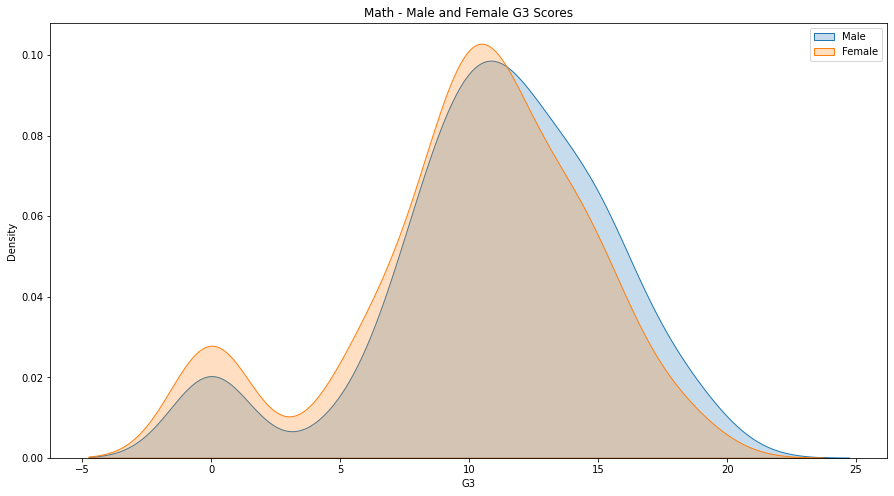

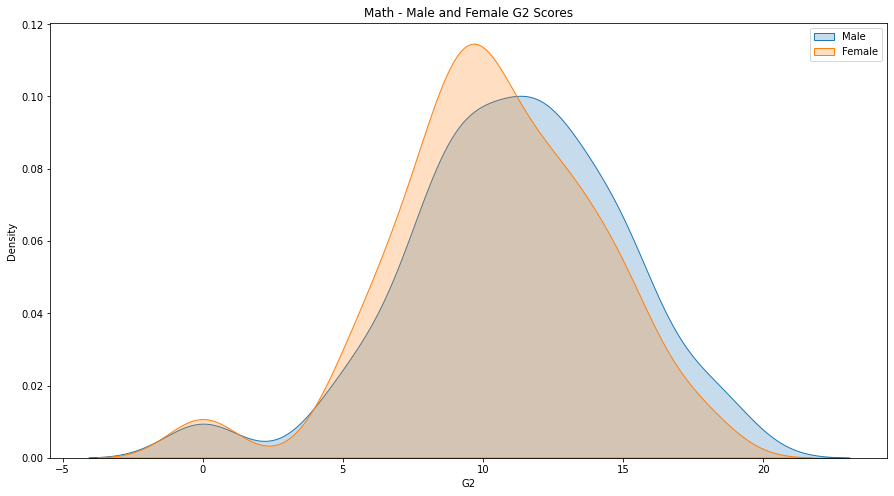

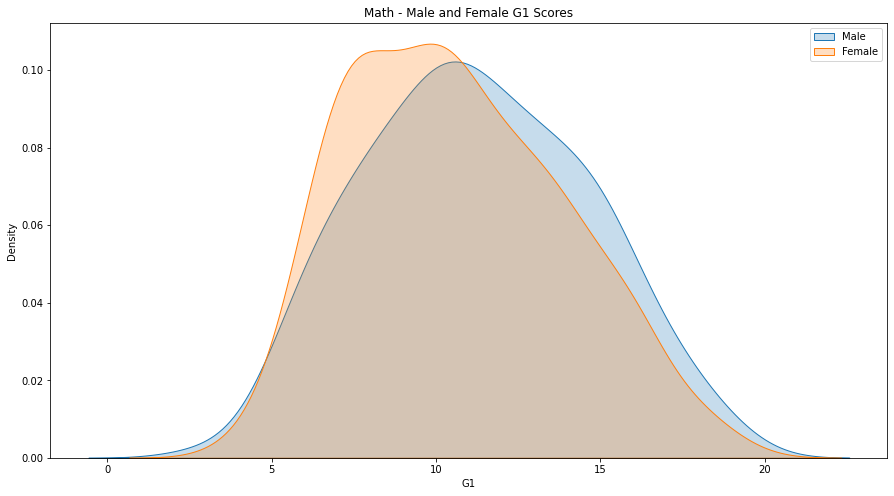

In [8]:
column_names = ['G3', 'G2', 'G1']

for column_name in column_names:
    show_male_female_relatioship_with_kde(column_name)

### Swarm Plots

#### G3 <> Guardian
Students who have their mother as their guardians generally perform better in Math

#### G3 <> Romantic
Students who have romantic relationship generally perform poorer in Math

#### G3 <> Family Size

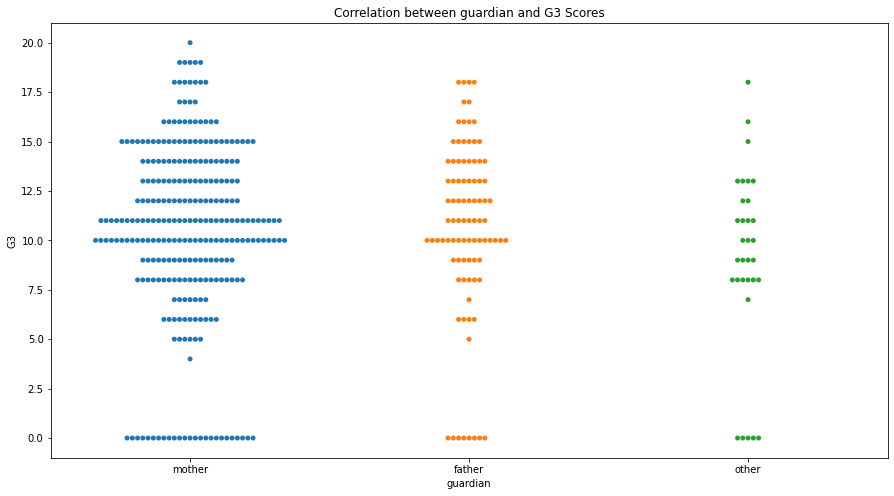

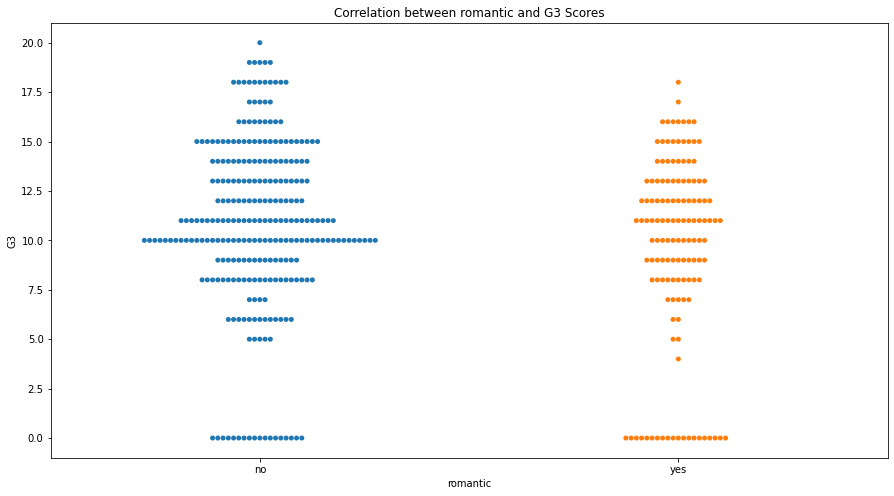

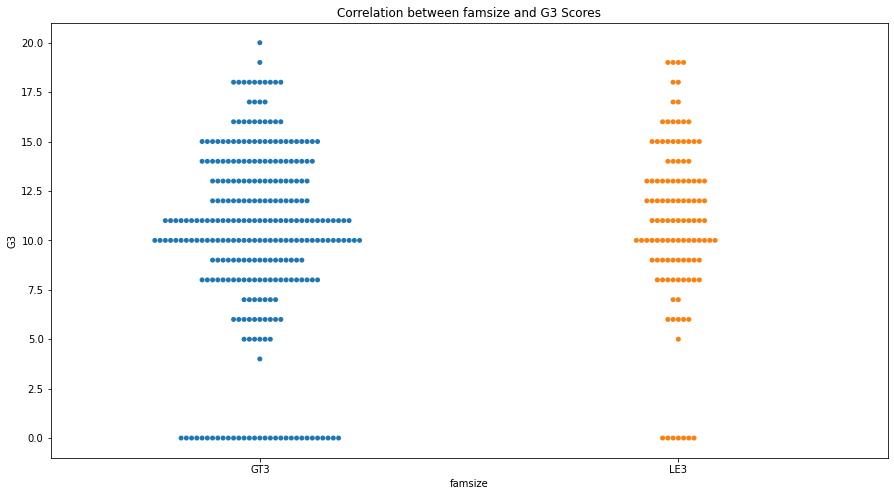

In [9]:
x_col_names = ['guardian', 'romantic', 'famsize']
y_col_name = 'G3'

for column_name in x_col_names:
    show_male_female_relationship_with_swarmplot(column_name, y_col_name)

#### G3 <> School
#### G3 <> Mother Education
#### G3 <> Father Education

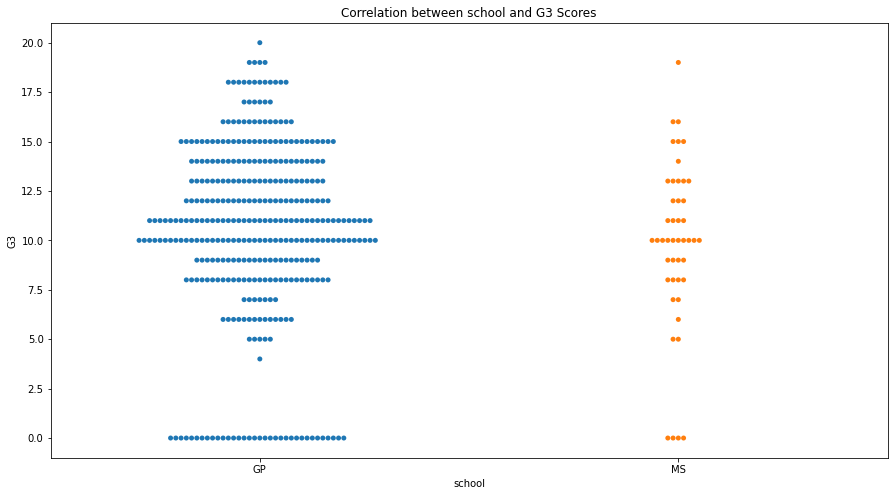

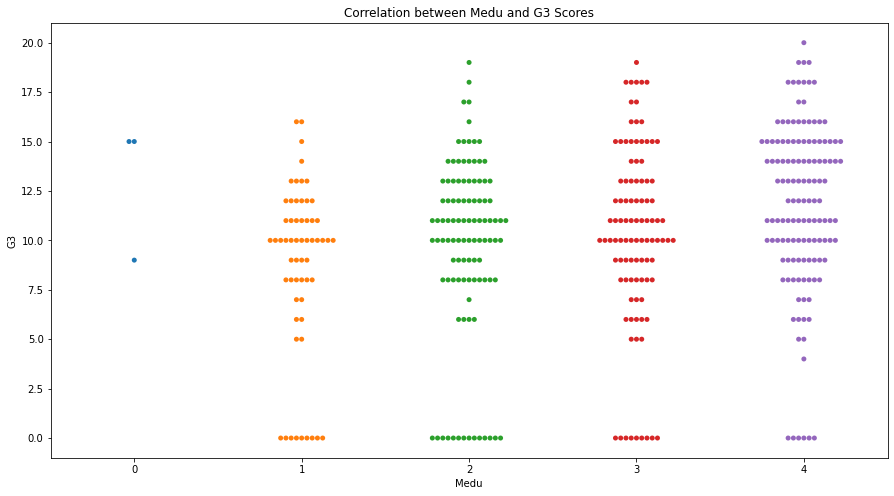

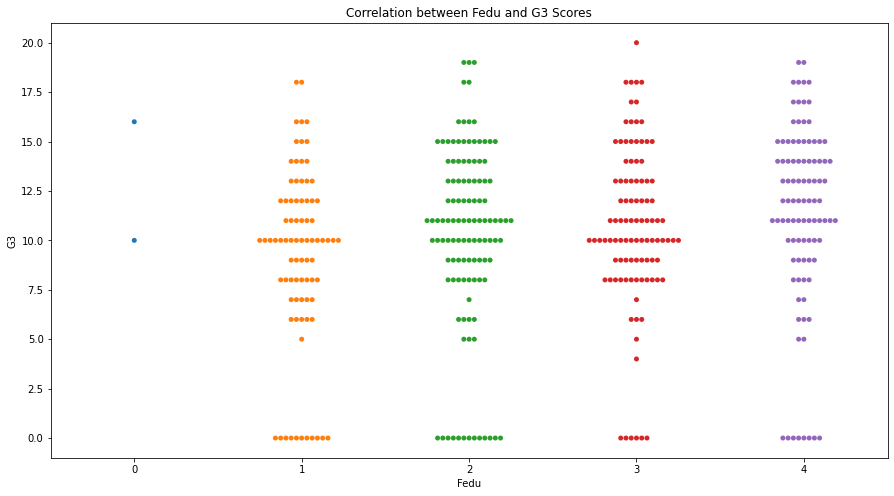

In [10]:
x_col_names = ['school', 'Medu', 'Fedu']
y_col_name = 'G3'

for column_name in x_col_names:
    show_male_female_relationship_with_swarmplot(column_name, y_col_name)

#### G3 <> Internet
Students with internet access generally perform better

#### G3 <> Address
Students living in the urban area generally perform better

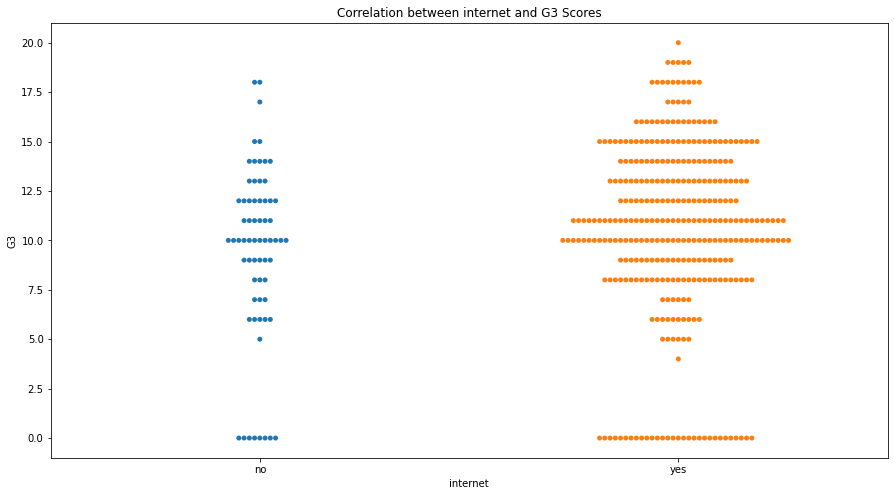

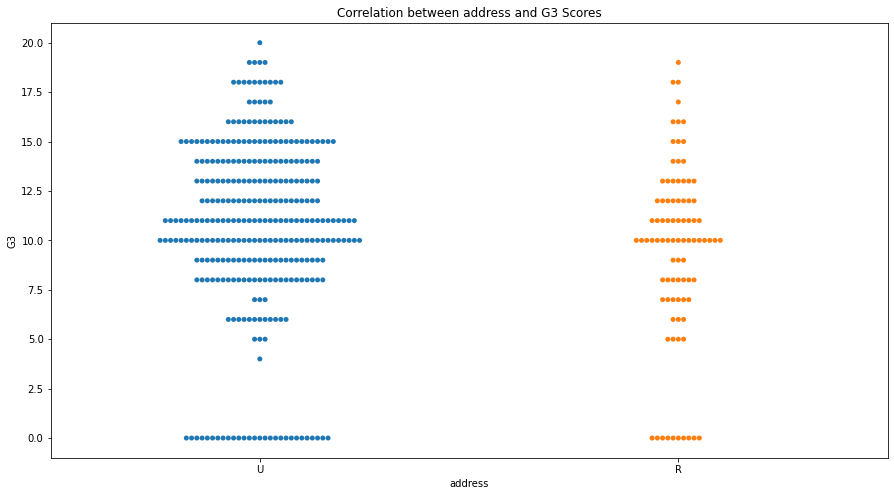

In [11]:
x_col_names = ['internet', 'address']
y_col_name = 'G3'

for column_name in x_col_names:
    show_male_female_relationship_with_swarmplot(column_name, y_col_name)

#### G3 <> Family relationship
Students with internet access generally perform better

#### G3 <> Freetime
Students living in the urban area generally perform better

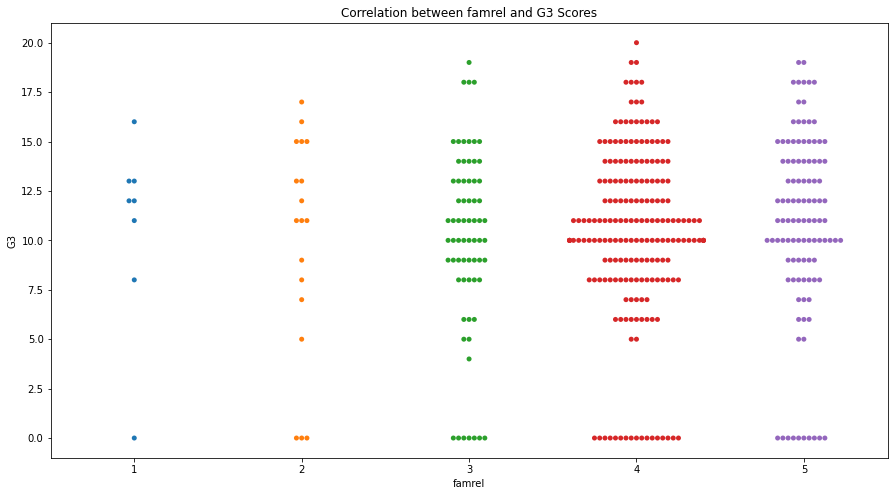

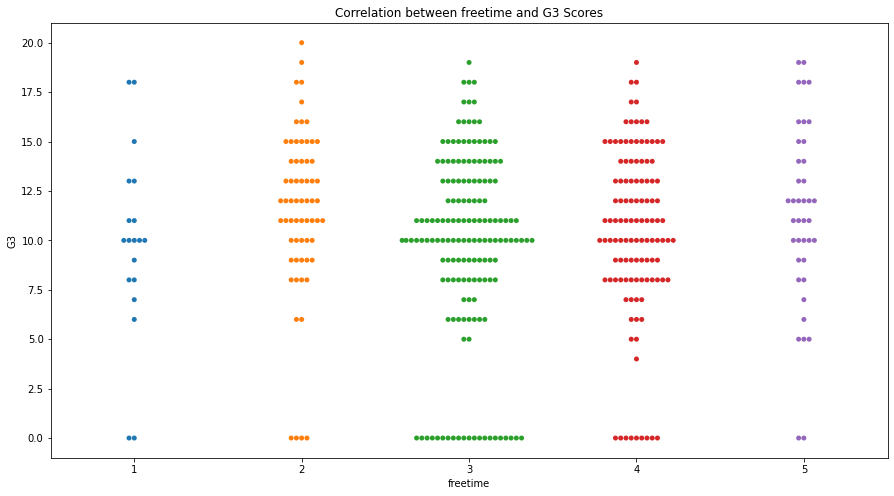

In [12]:
x_col_names = ['famrel', 'freetime']
y_col_name = 'G3'

for column_name in x_col_names:
    show_male_female_relationship_with_swarmplot(column_name, y_col_name)

### G3 <> Absences

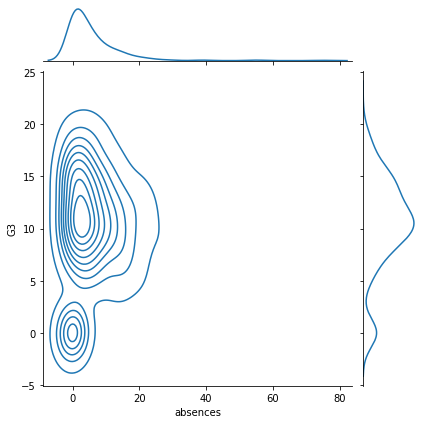

In [13]:
x_col_name = 'absences'
y_col_name = 'G3'

sns.jointplot(
    x = math[x_col_name], 
    y = math[y_col_name], 
    kind="kde"
)
plt.show()

### Students who scored 0 for their G3
Students who scored 0 for their final G3 grade.

There seems to be quite a handful of students who scored 0 for their test. Some of them even scored 0 on their G2 tests.

We might want to exclude these records to improve the overall accuracy of our model.

Although, our model won't be able to correctly predict the folks who scored 0.

In [14]:
math[math['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,home,father,1,2,3,no,yes,no,no,yes,yes,yes,no,3,3,2,1,1,3,0,6,7,0


## Relationship

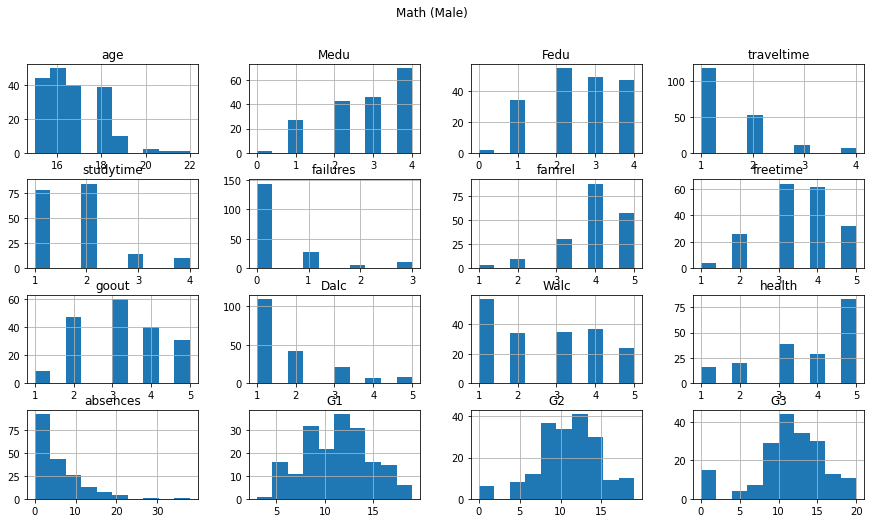

In [15]:
math_m.hist()
plt.suptitle("Math (Male)")
plt.show()

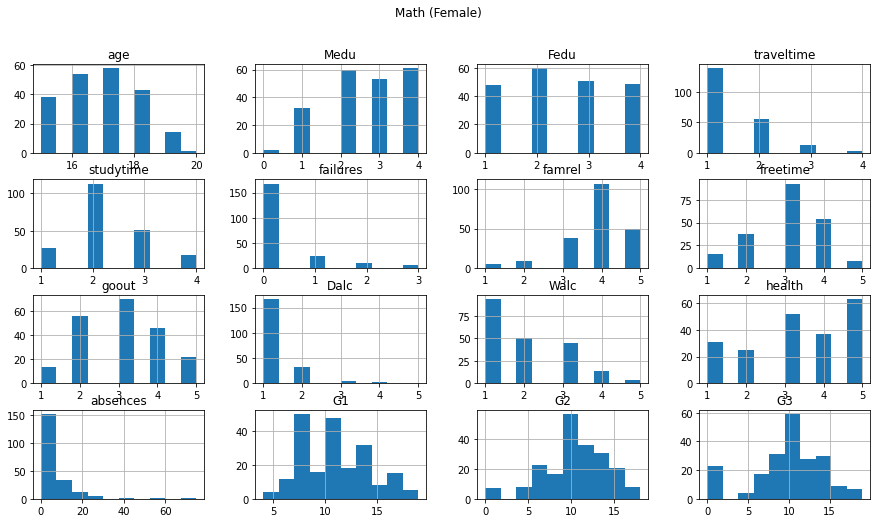

In [16]:
math_f.hist()
plt.suptitle("Math (Female)")
plt.show()

In [17]:
HEIGHT = 6

def lm_multi_dimensional_plot(df, hue_fetaure):
    sns.lmplot(x="index", y="G3", hue=hue_fetaure, data=df.reset_index(), height=HEIGHT)

### Environment Factors
- school choice
- the reason behind they chose those schools
- if they have access to the internet

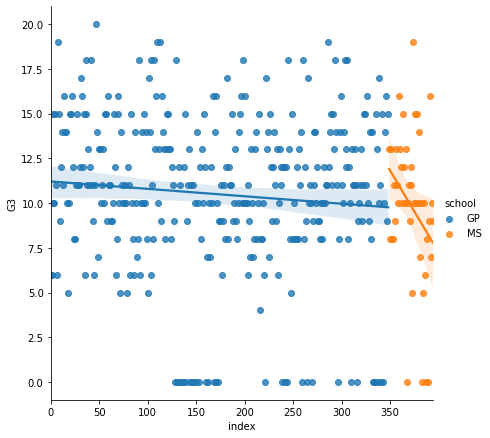

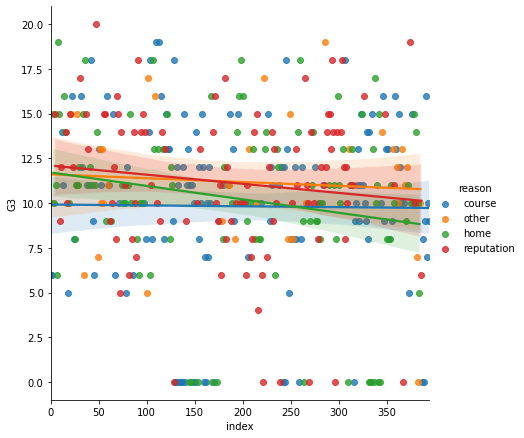

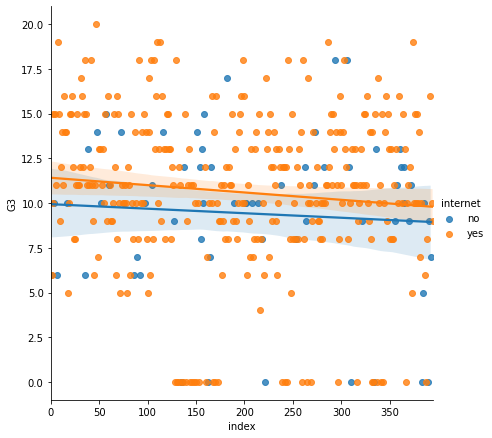

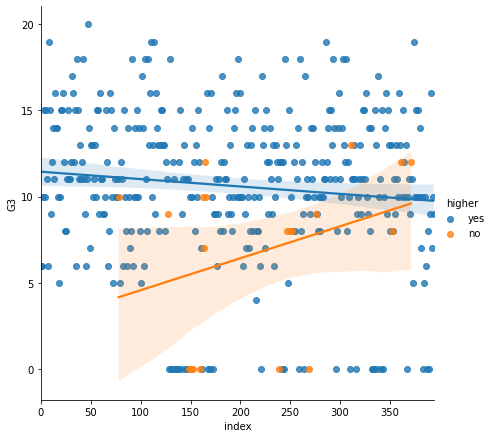

In [27]:
MULTI_DIMENSIONAL_FEATURES = ["school", "reason", "internet"]

for feature in MULTI_DIMENSIONAL_FEATURES:
    lm_multi_dimensional_plot(math, feature)

### Personal Factors
- extra educational support
- whether they paid for additional courses
- whether they have romantic partner
- how often they go out
- weekday alchohol consumption level
- weekend alchohol consumption level
- health
- CCA (Co-Curricular Activities)

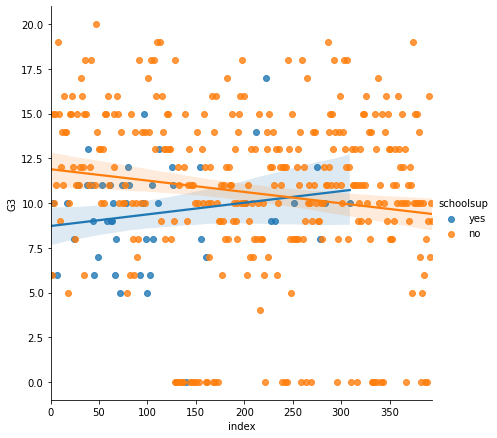

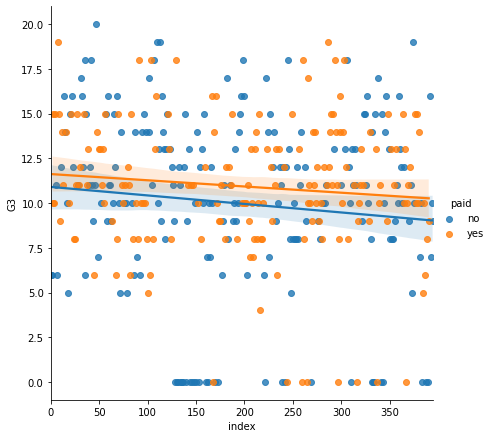

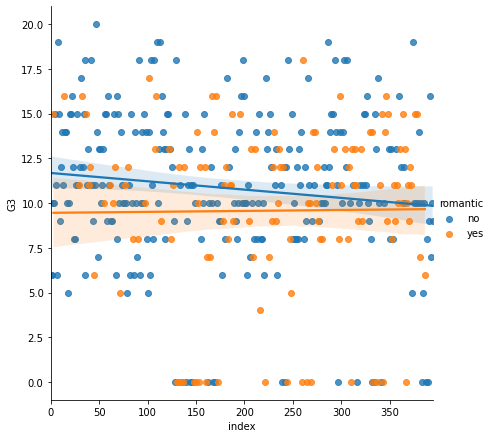

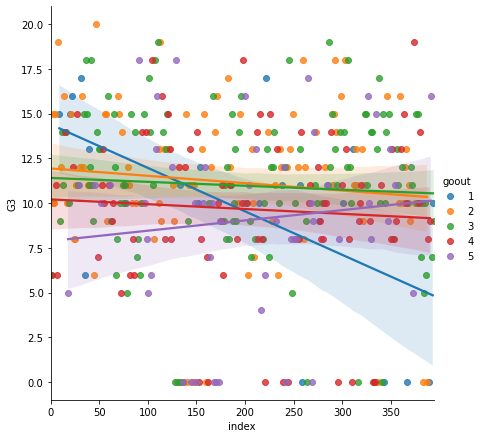

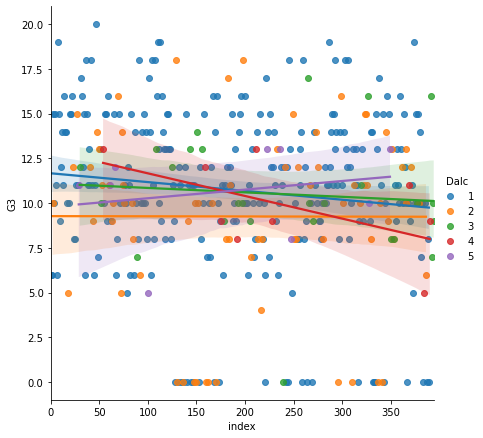

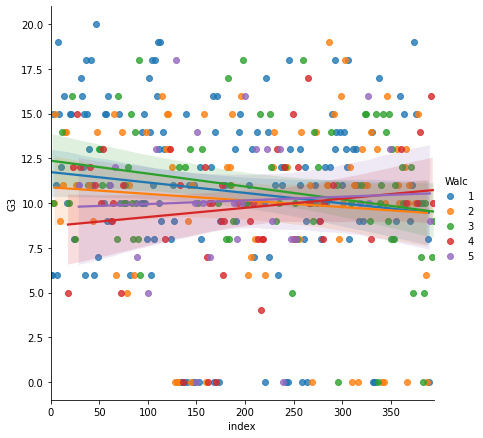

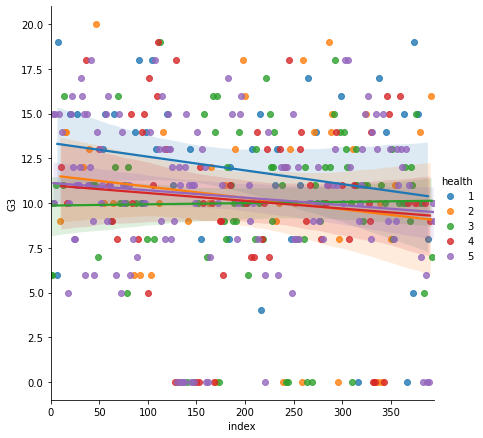

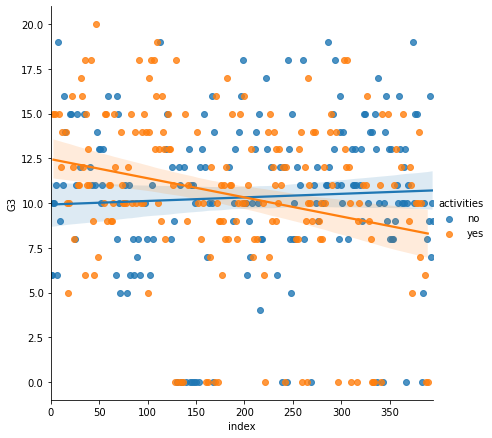

In [19]:
MULTI_DIMENSIONAL_FEATURES = ["schoolsup", "paid", "romantic", "goout", "Dalc", "Walc", "health", "activities"]

for feature in MULTI_DIMENSIONAL_FEATURES:
    lm_multi_dimensional_plot(math, feature)

### Family Environement Factors
- Family Size
- Parent Cohabitation Status (Apart / Together)
- address
- internet

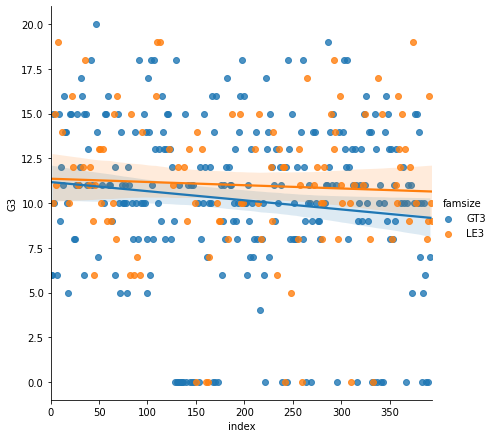

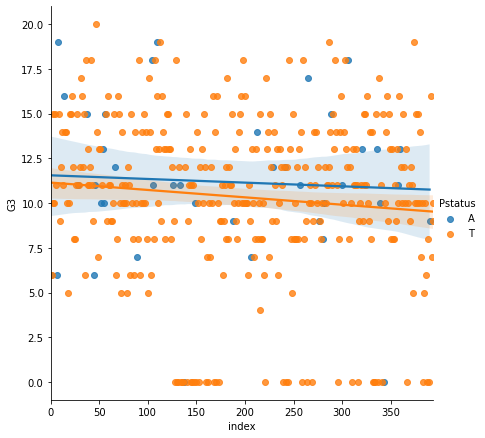

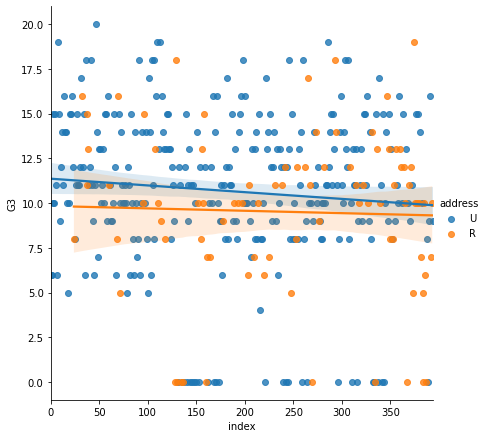

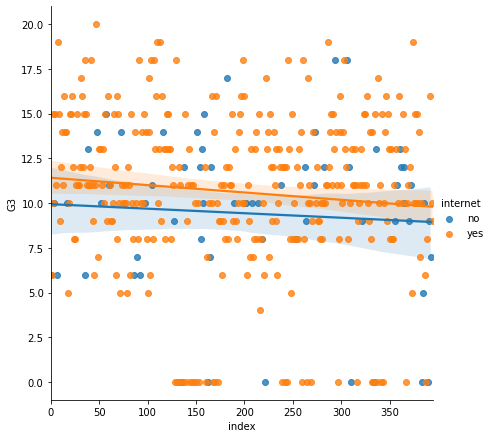

In [20]:
MULTI_DIMENSIONAL_FEATURES = ["famsize", "Pstatus", "address", "internet"]

for feature in MULTI_DIMENSIONAL_FEATURES:
    lm_multi_dimensional_plot(math, feature)

### Nuclear Family's Factors
- Father's job
- Mother's job
- Father's education
- Mother's education
- Guardian (mother, father, other)

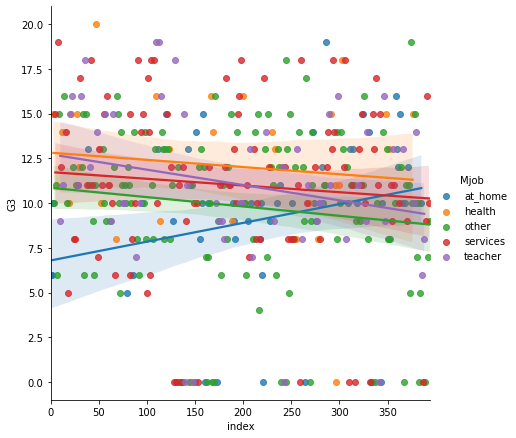

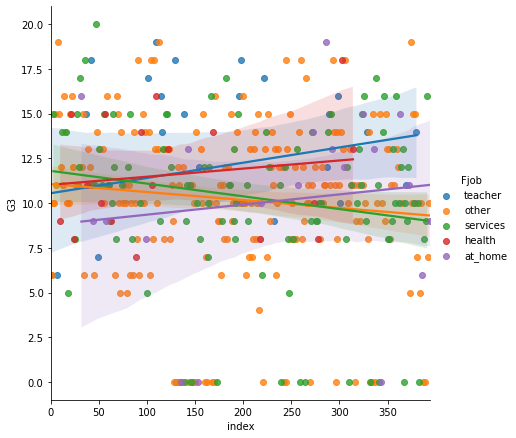

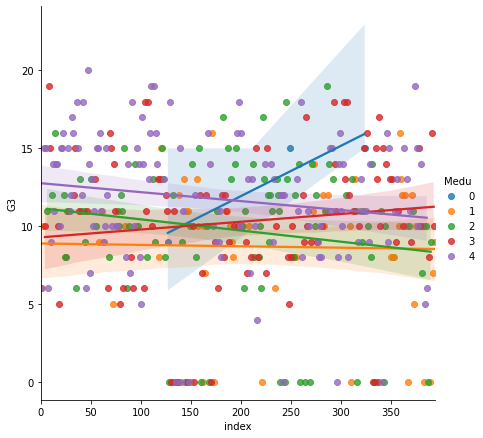

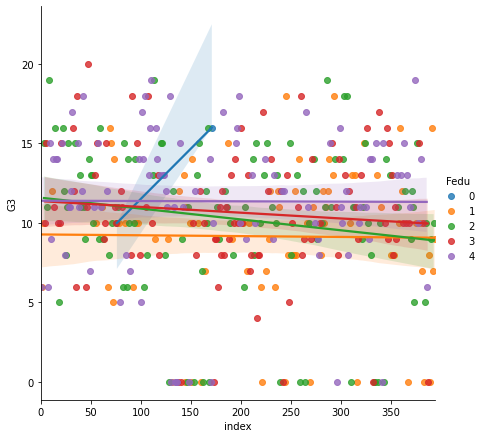

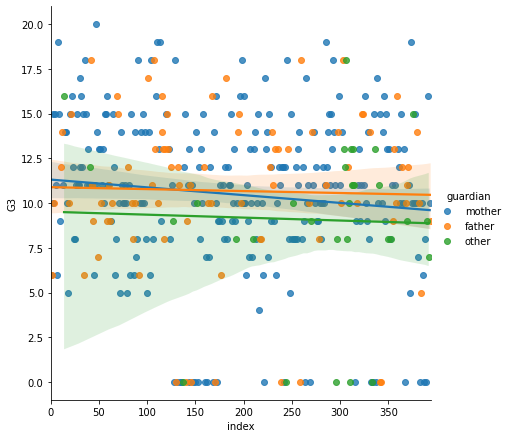

In [21]:
MULTI_DIMENSIONAL_FEATURES = ["Mjob", "Fjob", "Medu", "Fedu", "guardian"]

for feature in MULTI_DIMENSIONAL_FEATURES:
    lm_multi_dimensional_plot(math, feature)

## Prediction Target and Features

In [22]:
print(math.columns)
math.head()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [23]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Data Modeling

In [24]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model, svm

from collections import defaultdict


"""
    Data Preparation
"""

# there seems to be quite a handful of students who scored 0 for their test
# our model prediction increased dramatically upon removing these rows
def drop_zero_g3_cols(df):
    df_droped_zeroes = df.loc[df.G3 != 0]
    return df_droped_zeroes

def get_target_and_features(df, feature_names, convert_to_numeric=False):
    if convert_to_numeric: 
        df = to_numeric(df)
    
    X = df[feature_names]
    y = df['G3']

    return X, y

def to_numeric(df):
    d = defaultdict(LabelEncoder)
    return df.apply(lambda x: d[x.name].fit_transform(x))

def test_val_df_split(X, y, random_state, test_size):
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = random_state, test_size = test_size)
    
    return train_X, val_X, train_y, val_y

"""
    Data Modeling
"""
def generate_poly_features(train_X, val_X, poly_degree):
    poly = PolynomialFeatures(degree=poly_degree)
    X_ = poly.fit_transform(train_X)
    val_X_ = poly.fit_transform(val_X)
    return X_, val_X_

def fit_model(model, X_, train_y):
    model.fit(X_, train_y)

    # Obtain coefficients
    # print(lg.coef_)
    # print()
    
    return model
    
def predict(model, val_X_, val_y, print_individual_scores):
    score = model.score(val_X_, val_y)
        
    if print_individual_scores:
        print(f'Epoch #{epoch}')
        print(f'Prediction Score: {score}')

    # make prediction
    return score, model.predict(val_X_)


"""
    Model Evaluation
"""

def get_wrongly_predicted_df(predictions, val_X, val_y, print_individual_scores):
    rounded_predictions = np.round(predictions, 0)
    
    # get the mask of wrong prediction
    predicted_correctly_mask = rounded_predictions == val_y
    not_predicted_correctly_mask = ~predicted_correctly_mask
    
    corect_result_arr = predicted_correctly_mask.tolist().count(True)
    accuracy_percentage = (corect_result_arr / val_y.size) * 100

    df_predictions = val_X.copy()
    df_predictions["correct_prediction"] = predicted_correctly_mask
    df_predictions["rounded_predictions"] = rounded_predictions
    df_predictions["expected_predictions"] = val_y
    
        
    if print_individual_scores:
        print(f'Prediction Accuracy: {round(accuracy_percentage, 2)}% \n\n')
        print(df_predictions.filter(['rounded_predictions', 'expected_predictions'], axis=1))
    
    return accuracy_percentage, df_predictions
    
def plot_predicted_wrongly_graph(df_predictions):
    fig, axs = plt.subplots(2, 1, figsize=(15, 15))
    axs = axs.flatten()
        
    sns.scatterplot(x="index", y="rounded_predictions", hue="correct_prediction", data=df_predictions.reset_index(), ax = axs[0])
    sns.scatterplot(x="index", y="expected_predictions", data=df_predictions.reset_index(), ax = axs[1])

In [30]:
"""
    Variables
"""

CONVERT_TO_NUMERIC = True
DROP_ZEROES = True

TEST_SIZE = 0.25
TOTAL_EPOCH = 20

MATH_FEATURES = ['G1', 'G2', 'studytime', 'freetime', 'failures', 'Dalc', 'traveltime', 'higher']
# MATH_FEATURES = ['G1', 'G2', 'studytime', 'freetime', 'health', 'failures', 'internet', 'famrel', 'Dalc', 'age', 'traveltime']

POLY_DEGREE = 1
MODELS = [
    ["LINEAR REGRESSION", linear_model.LinearRegression()],
    ["SUPPORT VECTOR MACHINE (SVM)", svm.SVR()],
    ["DECISION TREE", DecisionTreeRegressor(max_depth=5)]
]
PRINT_INDIVIDUAL_SCORES = False


"""
    MAIN
"""

# data pre-prcessing
math_droped_zeroes = drop_zero_g3_cols(math) if DROP_ZEROES else math

# get X (features) and y (target)
X_math, y_math = get_target_and_features(math_droped_zeroes, MATH_FEATURES, convert_to_numeric=CONVERT_TO_NUMERIC)

for model_name, model in MODELS:
    total_score = 0
    total_predicted_correctly_percentage = 0
    
    print(f'{model_name}\n')

    for epoch in range(TOTAL_EPOCH):
        # split test and train set
        train_X_math, val_X_math, train_y_math, val_y_math = test_val_df_split(X_math, y_math, epoch, TEST_SIZE)

        # generate poly features
        X_math_, val_X_math_ = generate_poly_features(train_X_math, val_X_math, POLY_DEGREE)

        # fit model
        model = fit_model(model, X_math_, train_y_math)

        # predict
        score, predictions = predict(model, val_X_math_, val_y_math, PRINT_INDIVIDUAL_SCORES)
        total_score += score

        # figure out what went wrong
        accuracy_percentage, df_predictions = get_wrongly_predicted_df(predictions, val_X_math, val_y_math, PRINT_INDIVIDUAL_SCORES)
        total_predicted_correctly_percentage += accuracy_percentage

        # plot_predicted_wrongly_graph(df_predictions)

    print(f'Mean Score: {total_score / TOTAL_EPOCH}%')
    print(f'Mean Predicted Correctly Percentage: {total_predicted_correctly_percentage / TOTAL_EPOCH}%')
    print("\n======================================================\n")

LINEAR REGRESSION

Mean Score: 0.9303457674590089%
Mean Predicted Correctly Percentage: 49.22222222222223%


SUPPORT VECTOR MACHINE (SVM)

Mean Score: 0.9246620132530484%
Mean Predicted Correctly Percentage: 46.72222222222222%


DECISION TREE

Mean Score: 0.9101088575799118%
Mean Predicted Correctly Percentage: 44.05555555555556%




### Strong correlation
'G1', 'G2', 'studytime', 'freetime', 'failures', 'Dalc', 'traveltime', 'higher'

### Somehow correlated?
'nursery', 'famrel', 'age', 'Walc', 'health', 'internet'

### Weak correlation
'romantic', 'famsize', 'Pstatus', 'address', 'Mjob', 'Fjob', 'Medu', 'Fedu', 'guardian',
'schoolsup', 'paid', 'romantic', 'goout', 'school', 'reason', 'activities', 'absences'

In [26]:
#     print('With G3 rows dropped:\n')
#     print(f'New DF Dimension: {df_droped_zeroes.shape}')
#     print(f'Old DF Dimension: {df.shape}')
#     print('\n======================================\n')

#     print(f'Feature DF dimension: {X.shape}\n')
#     print(X.head())
#     print()
#     print(f'Target DF dimension: {y.shape}\n')
#     print(y.head())
#     print('\n======================================\n')

#     print(f'Training Feature dimension: {train_X.shape}')
#     print(f'Validation Feature dimension: {val_X.shape}')
#     print()
#     print(f'Training Target dimension: {train_y.shape}')
#     print(f'Validation Target dimension: {val_y.shape}')
#     print('\n======================================\n')

#     print(val_y_math)
#     print(rounded_predictions)
#     print(predicted_correctly_mask)
#     print()